# Random Forest: Feature Selection

In [4]:
import sys
print(sys.executable)

# shift 42 days?????

/Users/kata/opt/anaconda3/bin/python


In [5]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import treeplot
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn import tree

In [6]:
# https://mljar.com/blog/visualize-decision-tree/
df = pd.read_csv('/Users/kata/Desktop/GitHub/standby_duty_forecasting/sickness_table.csv', index_col=0)
df['date'] = pd.to_datetime(df['date'])
df


,date,n_sick,calls,n_duty,n_sby,sby_need,dafted
0,2016-04-01,73,8154.0,1700,90,4.0,0.0
1,2016-04-02,64,8526.0,1700,90,70.0,0.0
2,2016-04-03,68,8088.0,1700,90,0.0,0.0
3,2016-04-04,71,7044.0,1700,90,0.0,0.0
4,2016-04-05,63,7236.0,1700,90,0.0,0.0
...,...,...,...,...,...,...,...
1147,2019-05-23,86,8544.0,1900,90,0.0,0.0
1148,2019-05-24,81,8814.0,1900,90,0.0,0.0
1149,2019-05-25,76,9846.0,1900,90,146.0,56.0
1150,2019-05-26,83,9882.0,1900,90,160.0,70.0


In [7]:
df['diff_drivers'] = df['n_duty'] - df['n_sick']


df['year']= df['date'].dt.year
df['month']= df['date'].dt.month
df['day']= df['date'].dt.day

In [8]:
df['day_of_week'] = df['date'].dt.dayofweek
df


,date,n_sick,calls,n_duty,n_sby,sby_need,dafted,diff_drivers,year,month,day,day_of_week
0,2016-04-01,73,8154.0,1700,90,4.0,0.0,1627,2016,4,1,4
1,2016-04-02,64,8526.0,1700,90,70.0,0.0,1636,2016,4,2,5
2,2016-04-03,68,8088.0,1700,90,0.0,0.0,1632,2016,4,3,6
3,2016-04-04,71,7044.0,1700,90,0.0,0.0,1629,2016,4,4,0
4,2016-04-05,63,7236.0,1700,90,0.0,0.0,1637,2016,4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1147,2019-05-23,86,8544.0,1900,90,0.0,0.0,1814,2019,5,23,3
1148,2019-05-24,81,8814.0,1900,90,0.0,0.0,1819,2019,5,24,4
1149,2019-05-25,76,9846.0,1900,90,146.0,56.0,1824,2019,5,25,5
1150,2019-05-26,83,9882.0,1900,90,160.0,70.0,1817,2019,5,26,6


In [9]:
df['week'] = df['date'].dt.isocalendar().week

In [10]:
df['week'] = df['week'].astype(np.int64)

In [11]:
# convert week to uint64 because of xgboost error
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1152 entries, 0 to 1151
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          1152 non-null   datetime64[ns]
 1   n_sick        1152 non-null   int64         
 2   calls         1152 non-null   float64       
 3   n_duty        1152 non-null   int64         
 4   n_sby         1152 non-null   int64         
 5   sby_need      1152 non-null   float64       
 6   dafted        1152 non-null   float64       
 7   diff_drivers  1152 non-null   int64         
 8   year          1152 non-null   int64         
 9   month         1152 non-null   int64         
 10  day           1152 non-null   int64         
 11  day_of_week   1152 non-null   int64         
 12  week          1152 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(9)
memory usage: 126.0 KB


In [12]:
X = df[['n_sick', 'calls', 'n_duty', 'n_sby', 'diff_drivers', 'year', 'month', 'day_of_week',
       'week']]
y = df.sby_need

In [13]:
def train_test_split(data, n_test):
	return data[:n_test], data[n_test:]

In [14]:

x_train, x_test = train_test_split(X, 921)
y_train, y_test = train_test_split(y, 921)


In [15]:
tree_reg = DecisionTreeRegressor(max_depth=7, random_state=42)
tree_reg.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=7, random_state=42)

In [16]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [17]:
ax = treeplot.plot(tree_reg, plottype='vertical')


[treeplot] >Install graphviz first: <sudo apt install python-pydot python-pydot-ng graphviz>


In [18]:
test_pred = tree_reg.predict(x_test)
train_pred = tree_reg.predict(x_train)
y2 = np.concatenate((train_pred, test_pred))



In [19]:
# create column numerate
df['numbers'] = np.arange(len(df))
df

,date,n_sick,calls,n_duty,n_sby,sby_need,dafted,diff_drivers,year,month,day,day_of_week,week,numbers
0,2016-04-01,73,8154.0,1700,90,4.0,0.0,1627,2016,4,1,4,13,0
1,2016-04-02,64,8526.0,1700,90,70.0,0.0,1636,2016,4,2,5,13,1
2,2016-04-03,68,8088.0,1700,90,0.0,0.0,1632,2016,4,3,6,13,2
3,2016-04-04,71,7044.0,1700,90,0.0,0.0,1629,2016,4,4,0,14,3
4,2016-04-05,63,7236.0,1700,90,0.0,0.0,1637,2016,4,5,1,14,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1147,2019-05-23,86,8544.0,1900,90,0.0,0.0,1814,2019,5,23,3,21,1147
1148,2019-05-24,81,8814.0,1900,90,0.0,0.0,1819,2019,5,24,4,21,1148
1149,2019-05-25,76,9846.0,1900,90,146.0,56.0,1824,2019,5,25,5,21,1149
1150,2019-05-26,83,9882.0,1900,90,160.0,70.0,1817,2019,5,26,6,21,1150


In [20]:
y_test.shape
df.numbers.iloc[921:].shape

(231,)

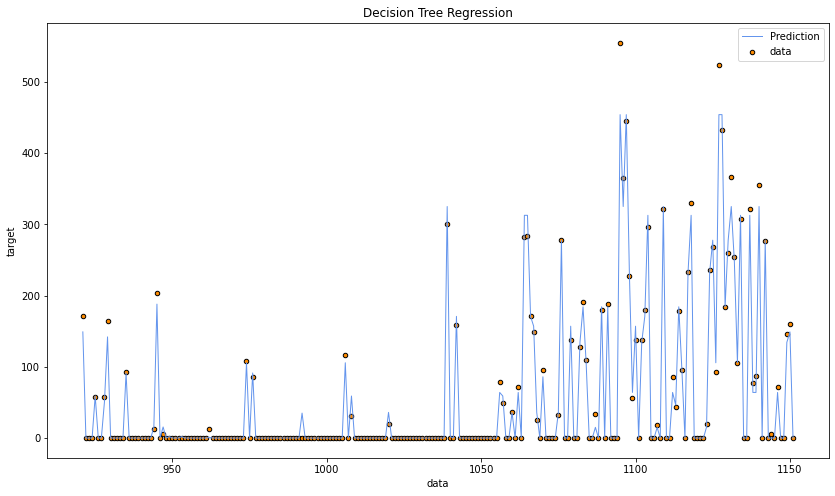

In [21]:

# Plot the results
plt.figure(figsize=(14,8))
plt.scatter(df.numbers.iloc[921:], y_test, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(df.numbers.iloc[921:], test_pred, color="cornflowerblue", label="Prediction", linewidth=1)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()



In [22]:
print('mse test set ' + str(mean_squared_error(y_test, test_pred)))
print('mse train set ' + str(mean_squared_error(y_train, train_pred)))


mse test set 135.39710057327403
mse train set 8.92393490512383


In [23]:
# max depth 7
# mse test set 67.99505531505531
# mse train set 0.10941006152732537

In [24]:
#max depth 5
# mse test set 68.29361982132801
# mse train set 3.589715752337902

Feature: n_sick, Score: 0.00403
Feature: calls, Score: 0.86388
Feature: n_duty, Score: 0.01475
Feature: n_sby, Score: 0.00000
Feature: diff_drivers, Score: 0.06668
Feature: year, Score: 0.04870
Feature: month, Score: 0.00104
Feature: day_of_week, Score: 0.00051
Feature: week, Score: 0.00041


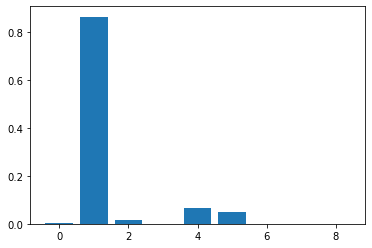

In [48]:
# https://machinelearningmastery.com/calculate-feature-importance-with-python/

#CART
model = DecisionTreeRegressor()
# fit the model
model.fit(x_train, y_train)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in zip(x_train.columns, enumerate(importance)):
	print('Feature: %s, Score: %.5f' % (i,v[1]))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 921 entries, 0 to 920
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   n_sick        921 non-null    int64  
 1   calls         921 non-null    float64
 2   n_duty        921 non-null    int64  
 3   n_sby         921 non-null    int64  
 4   diff_drivers  921 non-null    int64  
 5   year          921 non-null    int64  
 6   month         921 non-null    int64  
 7   day_of_week   921 non-null    int64  
 8   week          921 non-null    int64  
dtypes: float64(1), int64(8)
memory usage: 72.0 KB


In [49]:
# https://machinelearningmastery.com/calculate-feature-importance-with-python/


In [27]:
from sklearn.ensemble import RandomForestRegressor


Feature: n_sick, Score: 0.00443
Feature: calls, Score: 0.86757
Feature: n_duty, Score: 0.01715
Feature: n_sby, Score: 0.00000
Feature: diff_drivers, Score: 0.09050
Feature: year, Score: 0.01602
Feature: month, Score: 0.00109
Feature: day_of_week, Score: 0.00126
Feature: week, Score: 0.00198


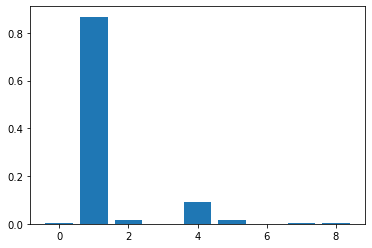

In [50]:
model = RandomForestRegressor()
# fit the model
model.fit(x_train, y_train)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in zip(x_train.columns, enumerate(importance)):
	print('Feature: %s, Score: %.5f' % (i,v[1]))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [29]:
import xgboost
from xgboost import XGBRegressor
from sklearn import preprocessing



Feature: n_sick, Score: 0.00136
Feature: calls, Score: 0.42730
Feature: n_duty, Score: 0.45478
Feature: n_sby, Score: 0.00000
Feature: diff_drivers, Score: 0.11395
Feature: year, Score: 0.00000
Feature: month, Score: 0.00030
Feature: day_of_week, Score: 0.00174
Feature: week, Score: 0.00057


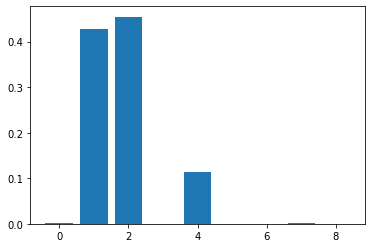

In [51]:
# xgboost


model = XGBRegressor()
# fit the model
model.fit(x_train, y_train)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in zip(x_train.columns, enumerate(importance)):
	print('Feature: %s, Score: %.5f' % (i,v[1]))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()



In [31]:
# permutation
from sklearn.neighbors import KNeighborsRegressor
from sklearn.inspection import permutation_importance

Feature: n_sick, Score: 3.88063
Feature: calls, Score: 11125.97782
Feature: n_duty, Score: 625.45303
Feature: n_sby, Score: 0.00000
Feature: diff_drivers, Score: 460.43496
Feature: year, Score: 0.00000
Feature: month, Score: 0.05906
Feature: day_of_week, Score: 0.00700
Feature: week, Score: 0.26899


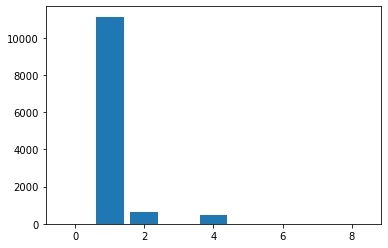

In [52]:
model = KNeighborsRegressor()
# fit the model
model.fit(x_train, y_train)
# perform permutation importance
results = permutation_importance(model, x_train, y_train, scoring='neg_mean_squared_error')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in zip(x_train.columns, enumerate(importance)):
	print('Feature: %s, Score: %.5f' % (i,v[1]))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [53]:
# https://machinelearningmastery.com/xgboost-for-time-series-forecasting/
import xgboost
print("xgboost", xgboost.__version__)


xgboost 1.6.1


In [34]:
model = XGBRegressor()

In [35]:
model.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [36]:
pred_y = model.predict(x_test)

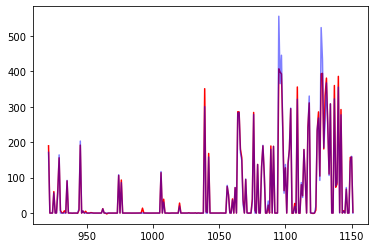

In [37]:
plt.plot(x_test.index, pred_y, color='red', label='pred')
plt.plot(x_test.index, y_test, color='blue', label='true', alpha=0.5)
plt.show()

In [38]:
mean_squared_error(y_test, pred_y)


258.36230857332663

In [39]:
# best mse with only sby need

In [40]:
# https://machinelearningmastery.com/feature-importance-and-feature-selection-with-xgboost-in-python/

[1.3626566e-03 4.2730123e-01 4.5477560e-01 0.0000000e+00 1.1395307e-01
 0.0000000e+00 2.9549911e-04 1.7391881e-03 5.7278550e-04]


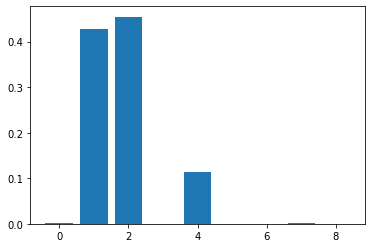

In [41]:
model = XGBRegressor()
model.fit(x_train, y_train)
# feature importance
print(model.feature_importances_)
# plot
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
plt.show()